# Kitchenware Classification

Image classification competition organized by DataTalks.Club.

In this competition you need to classify images of different kitchenware items into 6 classes:

* cups
* glasses
* plates
* spoons
* forks
* knives

Competition web page:

https://www.kaggle.com/competitions/kitchenware-classification

Dataset download:

https://www.kaggle.com/competitions/kitchenware-classification/data

or 

kaggle competitions download -c kitchenware-classification

I have made a results section to introduce each of the results I have obtained, because I used different cloud platforms to run the code, due to the extensive time and memory it needed. 

In [29]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

# Xeption
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xcep
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DenseNet121
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_input_dense

# EfficientNetB4
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficient

## Exploratory data analysis

In [31]:
train = pd.read_csv('train.csv')
train['image'] = train['Id'].map(lambda x: f'{x:0>4}.jpg')

In [32]:
train.head()
print(train.shape)

(5559, 3)


We have a total of 5559 images to train the model. 

In [33]:
train["label"].value_counts()/train.shape[0]

plate    0.220723
cup      0.204173
spoon    0.177910
knife    0.163519
glass    0.133477
fork     0.100198
Name: label, dtype: float64

From this total:

* plate    22 %
* cup      20 %
* spoon    18 %
* knife    16.5 %
* glass    13.5 %
* fork     10 %

Are the proportion of each kitchenware present in the dataset. 
Forks are the group with less elements, while plates are the group with most element in the train set. 

<AxesSubplot:xlabel='label', ylabel='count'>

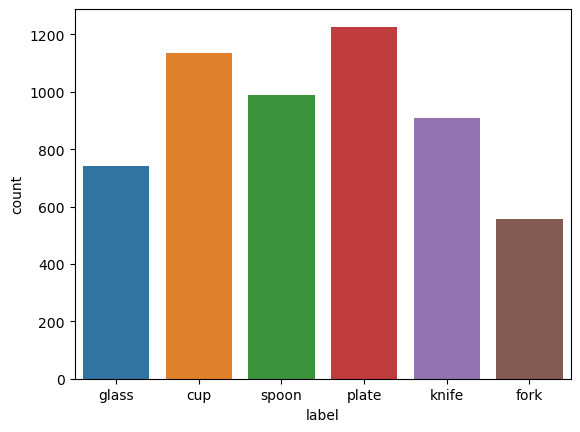

In [34]:
sns.countplot(x=train["label"])

From this plot we can visualize the total number of each kitchenware:

* plate    1227
* cup      1135
* spoon    989
* knife    909
* glass    742
* fork     557

# Classification Model

## Data split

Divide data in train, validation and test dataset.

In [36]:
train_df=train.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))
print(train_df.shape)
data = pd.concat([train_df,train]).drop_duplicates(keep=False)
print(data.shape)
val_df=data.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.6, random_state=42))
print(val_df.shape)
test_df = pd.concat([val_df,data]).drop_duplicates(keep=False)
print(test_df.shape)

(4169, 3)
(1390, 3)
(833, 3)
(557, 3)


Verify the subsample was stratified

In [37]:
train_df["label"].value_counts()/train_df.shape[0]

plate    0.220676
cup      0.204126
spoon    0.177980
knife    0.163588
glass    0.133365
fork     0.100264
Name: label, dtype: float64

In [38]:
val_df["label"].value_counts()/val_df.shape[0]

plate    0.220888
cup      0.204082
spoon    0.177671
knife    0.163265
glass    0.134454
fork     0.099640
Name: label, dtype: float64

In [39]:
test_df["label"].value_counts()/test_df.shape[0]

plate    0.220826
cup      0.204668
spoon    0.177738
knife    0.163375
glass    0.132855
fork     0.100539
Name: label, dtype: float64

### Exploring images

### Plate

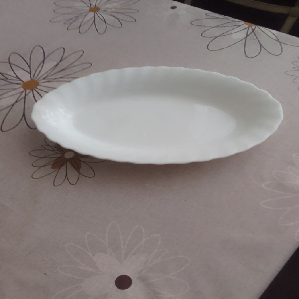

In [40]:
path = os.getcwd()
name = '/images/0002.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

### Glass

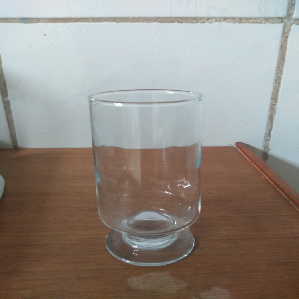

In [43]:
name = '/images/0068.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

### Fork

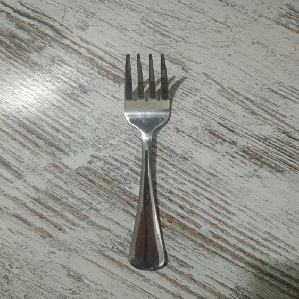

In [42]:
name = '/images/0036.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

### Spoon

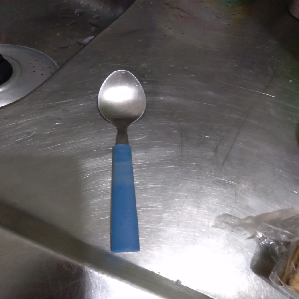

In [41]:
name = '/images/0001.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

### Knife

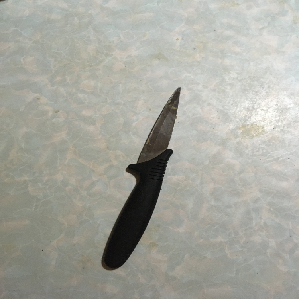

In [44]:
name = '/images/0025.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

### Cup

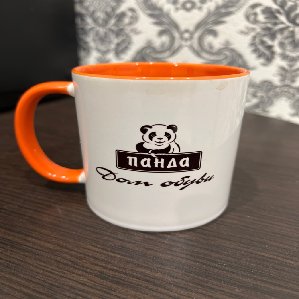

In [45]:
name = '/images/0000.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299,299))
img

After exploring an image of each class, I am going to continue to transform the last image to a an array and verify if the pre trained convolutional neural networks works properly for this problem. 

In [46]:
x = np.array(img)
x.shape

(299, 299, 3)

This is the numpy array that represents a cup. 

## Verify pre-trained convolutional neural networks works

* Pre-trained models: https://keras.io/api/applications/

The verification is going to be with the Xception model which its specifications can be found at the link https://keras.io/api/applications/xception/

In [47]:
model_x = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-12-07 15:17:26.680599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 15:17:26.837768: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


91884032/91884032 [==============================] - 107s 1us/step


In [48]:
X = np.array([x])

In [49]:
X.shape

(1, 299, 299, 3)

In [50]:
X = preprocess_input_xcep(X)

In [51]:
pred = model_x.predict(X)

1/1 [==============================] - 11s 11s/step


In [52]:
pred.shape

(1, 1000)

Everything seems to work properly.

The dimensions of the prediction is related to the 1000 clasess that the original dataset of imagenet classifies. 

Each of these values are the probability that the sample belongs to each class. 

To find more information about imagenet project access https://www.image-net.org/

In [53]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 6us/step


[[('n03063599', 'coffee_mug', 0.66249824),
  ('n07930864', 'cup', 0.111484356),
  ('n07920052', 'espresso', 0.043691665),
  ('n07932039', 'eggnog', 0.007362576),
  ('n03063689', 'coffeepot', 0.005290686)]]

Here we can appreciate tha the cup we provided as an input is classified as a coffee_mug, pretty close. 

To replace the 1000 classes in which the base model classifies, it is necessary to replacae the last dense part of the model that gives the predictons, that is what I am going to perform in next steps. 

## Tranfser learning

I will train multiple models and see wich performs best in the test data set and in the rest of the notebook I am going to tune it. 

The steps I am going to follow are:

* Reading data with `ImageDataGenerator`
* Train `Xception` model.
* Train `DenseNet201` model.
* Train `EfficientNetB4` model.


### Xception

Load data:

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input_xcep)
train_ds=train_gen.flow_from_dataframe(dataframe=train_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(299,299), batch_size=32,seed=42)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input_xcep)
val_ds=val_gen.flow_from_dataframe(dataframe=val_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(299,299), batch_size=32,seed=42)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input_xcep)
tests_ds=test_gen.flow_from_dataframe(dataframe=test_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(299,299), batch_size=32,seed=42)

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False, # Removemos la densa original y abajo la definimos y entrenamos.
    input_shape=(299, 299, 3)
)

base_model.trainable = False

# Inputs 
inputs = keras.Input(shape=(299, 299, 3))

# Entregamos los inputs al base model definido anteriormente
base = base_model(inputs, training=False)

# Al base model le aplicamos un Average pooling
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Y luego una densa 
outputs = keras.layers.Dense(6)(vectors)

model = keras.Model(inputs, outputs)

The base model contains the synaptic weights of the convolutional neural networl. What we do is to train on top of this model a new combination of dense layers so as to predict the clasess in which I am interested, that are the 6 classes from the kitchenware dataset. 

The parameter include_top=False is the one that specifies that we do not want to include the last combination of dense layers from the original model. 

We do not want to change the original synaptic weights of the convolutional neural networl, we just want to train a new dense last layer to classify. 

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Predict test set

In [ ]:
loss, acc = model.evaluate_generator(tests_ds, steps=10, verbose=0)

In [ ]:
print("Loss")
print(loss)
print("Accuracy")
print(acc)

### DenseNet201

In [ ]:
model_d = DenseNet121(weights='imagenet', input_shape=(224, 224, 3))

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input_dense)
train_ds=train_gen.flow_from_dataframe(dataframe=train_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(224,224), batch_size=32,seed=42)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input_dense)
val_ds=val_gen.flow_from_dataframe(dataframe=val_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(224,224), batch_size=32,seed=42)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input_dense)
tests_ds=test_gen.flow_from_dataframe(dataframe=test_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(224,224), batch_size=32,seed=42)

In [ ]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False, # Removemos la densa original y abajo la definimos y entrenamos.
    input_shape=(224, 224, 3)
)

base_model.trainable = False

# Inputs 
inputs = keras.Input(shape=(224, 224, 3))

# Entregamos los inputs al base model definido anteriormente
base = base_model(inputs, training=False)

# Al base model le aplicamos un Average pooling
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Y luego una densa 
outputs = keras.layers.Dense(6)(vectors)

model_d = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model_d.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model_d.fit(train_ds, epochs=10, validation_data=val_ds)

In [ ]:
loss, acc = model_d.evaluate_generator(tests_ds, steps=10, verbose=0)
print("Loss")
print(loss)
print("Accuracy")
print(acc)

### EfficientNetB4

In [ ]:
model_e = EfficientNetB4(weights='imagenet', input_shape=(380, 380, 3))

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
train_ds=train_gen.flow_from_dataframe(dataframe=train_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(380,380), batch_size=32,seed=42)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
val_ds=val_gen.flow_from_dataframe(dataframe=val_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(380,380), batch_size=32,seed=42)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
tests_ds=test_gen.flow_from_dataframe(dataframe=test_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(380,380), batch_size=32,seed=42)

In [ ]:
base_model = EfficientNetB4(
    weights='imagenet',
    include_top=False, # Removemos la densa original y abajo la definimos y entrenamos.
    input_shape=(380, 380, 3)
)

base_model.trainable = False

# Inputs 
inputs = keras.Input(shape=(380, 380, 3))

# Entregamos los inputs al base model definido anteriormente
base = base_model(inputs, training=False)

# Al base model le aplicamos un Average pooling
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Y luego una densa 
outputs = keras.layers.Dense(6)(vectors)

model_e = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model_e.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model_e.fit(train_ds, epochs=10, validation_data=val_ds)

In [ ]:
loss, acc = model_e.evaluate_generator(tests_ds, steps=10, verbose=0)
print("Loss")
print(loss)
print("Accuracy")
print(acc)

## Model information

* https://keras.io/api/applications/

| Model | Size (MB) | Top-1 Accuracy | Top-5 Accuracy | Parameters | Depth | Time (ms) per inference step (CPU) | Time (ms) per inference step (GPU) | 
| ------------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Xception | 88 | 79.0% | 94.5% | 22.9M | 81 | 109.4 | 8.1 |
| DenseNet121 | 33 | 75.0% | 92.3% | 8.1M | 242 | 77.1 | 5.4 |
| EfficientNetB4 | 75 | 82.9% | 96.4% | 19.5M | 258 | 308.3 | 15.1 |

### Results

The accuracy scores obtained for the runned models in the test set were:
* Xception 

    -> accuracy = 0.93

    -> loss = 0.15

* DenseNet121 

    -> accuracy = 0.94

    -> loss = 0.14

* EfficientNetB4 
    
    -> accuracy = 0.97

    -> loss = 0.11
                 
At first glance the model that demonstrated the best performance is EfficientNetB4, despite of being a litle bit slower than its competitors. In the next steps I am going to tune its hyperparameters. 

## Hyperparameter tunning

### Optimizing learning rate

When optimizing hyperparameters I am going to reduce image size to the half and to train for less epochs. 

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
train_ds=train_gen.flow_from_dataframe(dataframe=train_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(190,190), batch_size=32,seed=42)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
val_ds=val_gen.flow_from_dataframe(dataframe=val_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(190,190), batch_size=32,seed=42)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
tests_ds=test_gen.flow_from_dataframe(dataframe=test_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(190,190), batch_size=32,seed=42)

In [ ]:
def make_model(learning_rate=0.01):
    
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=(190, 190, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(190, 190, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    
    loss, acc = model.evaluate_generator(tests_ds, steps=10, verbose=0)
    print("Loss")
    print(loss)
    print("Accuracy")
    print(acc)
    print()
    print()
    print()
    print("-----NEXT-----")

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

### Results

0.0001

Epoch 1/10
131/131 [==============================] - 131s 891ms/step - loss: 1.2552 - accuracy: 0.6915 - val_loss: 0.8727 - val_accuracy: 0.8583
Epoch 2/10
131/131 [==============================] - 112s 856ms/step - loss: 0.6658 - accuracy: 0.9065 - val_loss: 0.5419 - val_accuracy: 0.9004
Epoch 3/10
131/131 [==============================] - 112s 854ms/step - loss: 0.4426 - accuracy: 0.9230 - val_loss: 0.4058 - val_accuracy: 0.9124
Epoch 4/10
131/131 [==============================] - 113s 862ms/step - loss: 0.3424 - accuracy: 0.9312 - val_loss: 0.3378 - val_accuracy: 0.9184
Epoch 5/10
131/131 [==============================] - 114s 872ms/step - loss: 0.2879 - accuracy: 0.9355 - val_loss: 0.2967 - val_accuracy: 0.9256
Epoch 6/10
131/131 [==============================] - 114s 869ms/step - loss: 0.2534 - accuracy: 0.9388 - val_loss: 0.2691 - val_accuracy: 0.9280
Epoch 7/10
131/131 [==============================] - 114s 867ms/step - loss: 0.2297 - accuracy: 0.9410 - val_loss: 0.2502 - val_accuracy: 0.9316
Epoch 8/10
131/131 [==============================] - 112s 855ms/step - loss: 0.2121 - accuracy: 0.9434 - val_loss: 0.2360 - val_accuracy: 0.9340
Epoch 9/10
131/131 [==============================] - 114s 869ms/step - loss: 0.1985 - accuracy: 0.9444 - val_loss: 0.2246 - val_accuracy: 0.9364
Epoch 10/10
131/131 [==============================] - 111s 850ms/step - loss: 0.1876 - accuracy: 0.9472 - val_loss: 0.2162 - val_accuracy: 0.9364

Loss 
0.17711198329925537

Accuracy
0.949999988079071



-----NEXT-----

0.001

Epoch 1/10
131/131 [==============================] - 130s 886ms/step - loss: 0.3904 - accuracy: 0.8978 - val_loss: 0.2009 - val_accuracy: 0.9364
Epoch 2/10
131/131 [==============================] - 111s 848ms/step - loss: 0.1603 - accuracy: 0.9523 - val_loss: 0.1745 - val_accuracy: 0.9400
Epoch 3/10
131/131 [==============================] - 112s 855ms/step - loss: 0.1317 - accuracy: 0.9590 - val_loss: 0.1611 - val_accuracy: 0.9424
Epoch 4/10
131/131 [==============================] - 113s 860ms/step - loss: 0.1120 - accuracy: 0.9664 - val_loss: 0.1566 - val_accuracy: 0.9400
Epoch 5/10
131/131 [==============================] - 111s 851ms/step - loss: 0.0983 - accuracy: 0.9710 - val_loss: 0.1557 - val_accuracy: 0.9400
Epoch 6/10
131/131 [==============================] - 111s 847ms/step - loss: 0.0874 - accuracy: 0.9746 - val_loss: 0.1546 - val_accuracy: 0.9400
Epoch 7/10
131/131 [==============================] - 113s 859ms/step - loss: 0.0791 - accuracy: 0.9787 - val_loss: 0.1539 - val_accuracy: 0.9436
Epoch 8/10
131/131 [==============================] - 112s 856ms/step - loss: 0.0718 - accuracy: 0.9803 - val_loss: 0.1532 - val_accuracy: 0.9412
Epoch 9/10
131/131 [==============================] - 114s 871ms/step - loss: 0.0659 - accuracy: 0.9832 - val_loss: 0.1549 - val_accuracy: 0.9436
Epoch 10/10
131/131 [==============================] - 118s 903ms/step - loss: 0.0599 - accuracy: 0.9846 - val_loss: 0.1517 - val_accuracy: 0.9412

Loss
0.131019726395607

Accuracy
0.953125



-----NEXT-----

0.01

Epoch 1/10
131/131 [==============================] - 133s 909ms/step - loss: 0.2606 - accuracy: 0.9235 - val_loss: 0.2183 - val_accuracy: 0.9352
Epoch 2/10
131/131 [==============================] - 113s 860ms/step - loss: 0.1194 - accuracy: 0.9611 - val_loss: 0.1914 - val_accuracy: 0.9304
Epoch 3/10
131/131 [==============================] - 115s 876ms/step - loss: 0.0734 - accuracy: 0.9784 - val_loss: 0.2141 - val_accuracy: 0.9400
Epoch 4/10
131/131 [==============================] - 115s 879ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.2230 - val_accuracy: 0.9316
Epoch 5/10
131/131 [==============================] - 113s 865ms/step - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.2306 - val_accuracy: 0.9376
Epoch 6/10
131/131 [==============================] - 113s 859ms/step - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.2288 - val_accuracy: 0.9364
Epoch 7/10
131/131 [==============================] - 113s 862ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.2717 - val_accuracy: 0.9268
Epoch 8/10
131/131 [==============================] - 114s 869ms/step - loss: 0.0261 - accuracy: 0.9935 - val_loss: 0.2520 - val_accuracy: 0.9304
Epoch 9/10
131/131 [==============================] - 113s 860ms/step - loss: 0.0188 - accuracy: 0.9957 - val_loss: 0.2452 - val_accuracy: 0.9364
Epoch 10/10
131/131 [==============================] - 114s 870ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.2821 - val_accuracy: 0.9388

Loss
0.40504130721092224

Accuracy
0.918749988079071



-----NEXT-----

0.1

Epoch 1/10
131/131 [==============================] - 130s 889ms/step - loss: 1.5666 - accuracy: 0.9091 - val_loss: 1.6829 - val_accuracy: 0.9280
Epoch 2/10
131/131 [==============================] - 114s 873ms/step - loss: 1.0219 - accuracy: 0.9475 - val_loss: 1.6419 - val_accuracy: 0.9232
Epoch 3/10
131/131 [==============================] - 112s 858ms/step - loss: 0.6564 - accuracy: 0.9623 - val_loss: 1.6869 - val_accuracy: 0.9304
Epoch 4/10
131/131 [==============================] - 113s 866ms/step - loss: 0.6858 - accuracy: 0.9674 - val_loss: 1.7871 - val_accuracy: 0.9220
Epoch 5/10
131/131 [==============================] - 113s 859ms/step - loss: 0.5265 - accuracy: 0.9722 - val_loss: 1.9581 - val_accuracy: 0.9280
Epoch 6/10
131/131 [==============================] - 115s 875ms/step - loss: 0.3793 - accuracy: 0.9801 - val_loss: 2.2247 - val_accuracy: 0.9184
Epoch 7/10
131/131 [==============================] - 113s 860ms/step - loss: 0.3192 - accuracy: 0.9827 - val_loss: 2.1691 - val_accuracy: 0.9184
Epoch 8/10
131/131 [==============================] - 113s 864ms/step - loss: 0.2731 - accuracy: 0.9830 - val_loss: 2.4487 - val_accuracy: 0.9268
Epoch 9/10
131/131 [==============================] - 113s 860ms/step - loss: 0.2635 - accuracy: 0.9794 - val_loss: 2.3847 - val_accuracy: 0.9184
Epoch 10/10
131/131 [==============================] - 113s 861ms/step - loss: 0.2859 - accuracy: 0.9861 - val_loss: 2.6946 - val_accuracy: 0.9292

Loss
3.3504090309143066

Accuracy
0.9281250238418579



-----NEXT-----

The best learning rate it was identified to be 0.001. 

In [14]:
learning_rate = 0.001

### Architecture

Explore different architectures and optimize its hyperparameters.

In [ ]:
def make_model_1(learning_rate=0.01, size_inner=100, droprate=0.3):
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=(190, 190, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(190, 190, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    
    return model

In [ ]:
learning_rate = 0.001

scores = {}

for droprate in [0.3,0.5]:
    for size_inner in [100,300]:
        print(droprate)
        print(size_inner)
        
        model = make_model_1(
            learning_rate=learning_rate,
            size_inner=size_inner,
            droprate=droprate
        )

        history = model.fit(train_ds, epochs=5, validation_data=val_ds)

        loss, acc = model.evaluate_generator(tests_ds, steps=5, verbose=0)
        print("Loss")
        print(loss)
        print("Accuracy")
        print(acc)
        print()
        print()
        print()
        print("-----NEXT-----")

### Results

0.3
100

Epoch 1/5
131/131 [==============================] - 116s 807ms/step - loss: 0.2659 - accuracy: 0.9213 - val_loss: 0.1642 - val_accuracy: 0.9424
Epoch 2/5
131/131 [==============================] - 115s 875ms/step - loss: 0.1311 - accuracy: 0.9566 - val_loss: 0.1660 - val_accuracy: 0.9424
Epoch 3/5
131/131 [==============================] - 113s 859ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.1595 - val_accuracy: 0.9484
Epoch 4/5
131/131 [==============================] - 73s 558ms/step - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.1735 - val_accuracy: 0.9472
Epoch 5/5
131/131 [==============================] - 73s 554ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.1712 - val_accuracy: 0.9472

Loss
0.13882455229759216

Accuracy
0.956250011920929



-----NEXT-----

0.3
300

Epoch 1/5
131/131 [==============================] - 115s 812ms/step - loss: 0.2249 - accuracy: 0.9232 - val_loss: 0.1925 - val_accuracy: 0.9232
Epoch 2/5
131/131 [==============================] - 114s 874ms/step - loss: 0.1032 - accuracy: 0.9674 - val_loss: 0.1762 - val_accuracy: 0.9388
Epoch 3/5
131/131 [==============================] - 114s 867ms/step - loss: 0.0707 - accuracy: 0.9806 - val_loss: 0.1899 - val_accuracy: 0.9292
Epoch 4/5
131/131 [==============================] - 73s 556ms/step - loss: 0.0466 - accuracy: 0.9866 - val_loss: 0.1601 - val_accuracy: 0.9484
Epoch 5/5
131/131 [==============================] - 72s 553ms/step - loss: 0.0370 - accuracy: 0.9899 - val_loss: 0.1838 - val_accuracy: 0.9424

Loss
0.1565546691417694

Accuracy
0.96875



-----NEXT-----

0.5
100

Epoch 1/5
131/131 [==============================] - 86s 588ms/step - loss: 0.3033 - accuracy: 0.9012 - val_loss: 0.1733 - val_accuracy: 0.9400
Epoch 2/5
131/131 [==============================] - 73s 555ms/step - loss: 0.1524 - accuracy: 0.9525 - val_loss: 0.1605 - val_accuracy: 0.9400
Epoch 3/5
131/131 [==============================] - 74s 566ms/step - loss: 0.1156 - accuracy: 0.9631 - val_loss: 0.1579 - val_accuracy: 0.9484
Epoch 4/5
131/131 [==============================] - 73s 558ms/step - loss: 0.0908 - accuracy: 0.9731 - val_loss: 0.1599 - val_accuracy: 0.9484
Epoch 5/5
131/131 [==============================] - 72s 549ms/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.1667 - val_accuracy: 0.9376

Loss
0.13038066029548645

Accuracy
0.9437500238418579



-----NEXT-----

0.5
300

Epoch 1/5
131/131 [==============================] - 85s 575ms/step - loss: 0.2576 - accuracy: 0.9160 - val_loss: 0.1784 - val_accuracy: 0.9364
Epoch 2/5
131/131 [==============================] - 72s 547ms/step - loss: 0.1354 - accuracy: 0.9551 - val_loss: 0.1642 - val_accuracy: 0.9472
Epoch 3/5
131/131 [==============================] - 72s 552ms/step - loss: 0.0929 - accuracy: 0.9674 - val_loss: 0.1605 - val_accuracy: 0.9436
Epoch 4/5
131/131 [==============================] - 72s 549ms/step - loss: 0.0678 - accuracy: 0.9779 - val_loss: 0.1799 - val_accuracy: 0.9412
Epoch 5/5
131/131 [==============================] - 73s 553ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.1582 - val_accuracy: 0.9400

Loss
0.16377215087413788

Accuracy
0.9624999761581421



-----NEXT-----

The best results for this architecture were found with the combination of a dropout of 0.3 and a inner size of 300.

In [ ]:
def make_model_2(learning_rate=0.01, size_inner=300, size_inner_2=100, droprate=0.3, droprate_2=0.3):
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=(190, 190, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(190, 190, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    inner_2 = keras.layers.Dense(size_inner, activation='relu')(drop)
    drop_2 = keras.layers.Dropout(droprate)(inner_2)
    
    outputs = keras.layers.Dense(6)(drop_2)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    
    return model

In [ ]:
learning_rate = 0.001
size = 300
drop = 0.3

scores = {}

for droprate in [0.3,0.5]:
    for size_inner in [100,300]:
        print(droprate)
        print(size_inner)
        
        model = make_model_2(
            learning_rate=learning_rate,
            size_inner=size,
            droprate=drop,
            size_inner_2=droprate,
            droprate_2=size_inner,
            
        )

        history = model.fit(train_ds, epochs=5, validation_data=val_ds)

        loss, acc = model.evaluate_generator(tests_ds, steps=5, verbose=0)
        print("Loss")
        print(loss)
        print("Accuracy")
        print(acc)
        print()
        print()
        print()
        print("-----NEXT-----")

### Results

0.3
100

Epoch 1/5
131/131 [==============================] - 106s 708ms/step - loss: 0.2811 - accuracy: 0.9093 - val_loss: 0.1822 - val_accuracy: 0.9328
Epoch 2/5
131/131 [==============================] - 72s 551ms/step - loss: 0.1355 - accuracy: 0.9580 - val_loss: 0.1720 - val_accuracy: 0.9436
Epoch 3/5
131/131 [==============================] - 81s 616ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.1770 - val_accuracy: 0.9400
Epoch 4/5
131/131 [==============================] - 72s 551ms/step - loss: 0.0786 - accuracy: 0.9760 - val_loss: 0.2003 - val_accuracy: 0.9364
Epoch 5/5
131/131 [==============================] - 72s 551ms/step - loss: 0.0495 - accuracy: 0.9861 - val_loss: 0.1792 - val_accuracy: 0.9496

Loss
0.20717406272888184

Accuracy
0.956250011920929



-----NEXT-----

0.3
300

Epoch 1/5
131/131 [==============================] - 86s 579ms/step - loss: 0.2783 - accuracy: 0.9136 - val_loss: 0.1564 - val_accuracy: 0.9412
Epoch 2/5
131/131 [==============================] - 73s 558ms/step - loss: 0.1303 - accuracy: 0.9575 - val_loss: 0.1893 - val_accuracy: 0.9340
Epoch 3/5
131/131 [==============================] - 72s 551ms/step - loss: 0.0893 - accuracy: 0.9695 - val_loss: 0.1977 - val_accuracy: 0.9376
Epoch 4/5
131/131 [==============================] - 72s 552ms/step - loss: 0.0783 - accuracy: 0.9775 - val_loss: 0.2048 - val_accuracy: 0.9340
Epoch 5/5
131/131 [==============================] - 72s 551ms/step - loss: 0.0634 - accuracy: 0.9784 - val_loss: 0.1839 - val_accuracy: 0.9508

Loss
0.04680141061544418

Accuracy
0.987500011920929



-----NEXT-----

0.5
100

Epoch 1/5
131/131 [==============================] - 84s 571ms/step - loss: 0.2745 - accuracy: 0.9091 - val_loss: 0.1871 - val_accuracy: 0.9340
Epoch 2/5
131/131 [==============================] - 72s 551ms/step - loss: 0.1369 - accuracy: 0.9590 - val_loss: 0.1800 - val_accuracy: 0.9424
Epoch 3/5
131/131 [==============================] - 72s 550ms/step - loss: 0.0931 - accuracy: 0.9698 - val_loss: 0.1845 - val_accuracy: 0.9412
Epoch 4/5
131/131 [==============================] - 76s 583ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.1873 - val_accuracy: 0.9460
Epoch 5/5
131/131 [==============================] - 114s 871ms/step - loss: 0.0478 - accuracy: 0.9866 - val_loss: 0.2170 - val_accuracy: 0.9376

Loss
0.2093227356672287

Accuracy
0.9437500238418579



-----NEXT-----

0.5
300

Epoch 1/5
131/131 [==============================] - 133s 908ms/step - loss: 0.2812 - accuracy: 0.9086 - val_loss: 0.1826 - val_accuracy: 0.9340
Epoch 2/5
131/131 [==============================] - 72s 550ms/step - loss: 0.1378 - accuracy: 0.9535 - val_loss: 0.1787 - val_accuracy: 0.9388
Epoch 3/5
131/131 [==============================] - 72s 551ms/step - loss: 0.0874 - accuracy: 0.9719 - val_loss: 0.1502 - val_accuracy: 0.9376
Epoch 4/5
131/131 [==============================] - 73s 557ms/step - loss: 0.0723 - accuracy: 0.9779 - val_loss: 0.1647 - val_accuracy: 0.9424
Epoch 5/5
131/131 [==============================] - 72s 550ms/step - loss: 0.0533 - accuracy: 0.9820 - val_loss: 0.2066 - val_accuracy: 0.9352

Loss
0.14681223034858704

Accuracy
0.9437500238418579



-----NEXT-----

The best results for the seccond stacked architecture were found with the combination of a dropout of 0.3 and a inner size of 300.

## Final model

Train the best model we found in all the data and its original size. 

I will do a new partition of the data only in train and validation.

#### New data splitting

In [15]:
train_df=train.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.85, random_state=1996))
print(train_df.shape)
val_df = pd.concat([train_df,train]).drop_duplicates(keep=False)
print(val_df.shape)

(4726, 3)
(833, 3)


In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
train_ds=train_gen.flow_from_dataframe(dataframe=train_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(380,380), batch_size=32,seed=42)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
val_ds=val_gen.flow_from_dataframe(dataframe=val_df, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col="label", class_mode="categorical", 
                                            target_size=(380,380), batch_size=32,seed=42)

Found 4726 validated image filenames belonging to 6 classes.
Found 833 validated image filenames belonging to 6 classes.


In [18]:
# Best hyperparameters
learning_rate = 0.001
size = 300
drop = 0.3

In [19]:
def make_final_model(learning_rate=0.01, size_inner=300, size_inner_2=300, droprate=0.3, droprate_2=0.3):
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=(380, 380, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(380, 380, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    inner_2 = keras.layers.Dense(size_inner_2, activation='relu')(drop)
    drop_2 = keras.layers.Dropout(droprate_2)(inner_2)
    
    outputs = keras.layers.Dense(6)(drop_2)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    
    return model

In [20]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'EfficientNetB4{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=False,
    monitor='val_accuracy',
    mode='max'
)

In [23]:
model = make_final_model()

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

### Results

Epoch 1/50
148/148 [==============================] - 193s 1s/step - loss: 0.3588 - accuracy: 0.9185 - val_loss: 0.1485 - val_accuracy: 0.9520
Epoch 2/50
148/148 [==============================] - 170s 1s/step - loss: 0.2464 - accuracy: 0.9503 - val_loss: 0.1633 - val_accuracy: 0.9628
Epoch 3/50
148/148 [==============================] - 121s 814ms/step - loss: 0.4603 - accuracy: 0.9388 - val_loss: 0.2003 - val_accuracy: 0.9556
Epoch 4/50
148/148 [==============================] - 121s 814ms/step - loss: 0.3897 - accuracy: 0.9410 - val_loss: 0.1347 - val_accuracy: 0.9580
Epoch 5/50
148/148 [==============================] - 121s 813ms/step - loss: 0.2311 - accuracy: 0.9577 - val_loss: 0.1808 - val_accuracy: 0.9628
Epoch 6/50
148/148 [==============================] - 121s 815ms/step - loss: 0.3475 - accuracy: 0.9562 - val_loss: 0.2080 - val_accuracy: 0.9580
Epoch 7/50
148/148 [==============================] - 121s 813ms/step - loss: 0.3730 - accuracy: 0.9465 - val_loss: 0.3975 - val_accuracy: 0.9568
Epoch 8/50
148/148 [==============================] - 121s 814ms/step - loss: 0.2741 - accuracy: 0.9592 - val_loss: 0.1961 - val_accuracy: 0.9640
Epoch 9/50
148/148 [==============================] - 121s 815ms/step - loss: 0.3024 - accuracy: 0.9585 - val_loss: 0.1790 - val_accuracy: 0.9592
Epoch 10/50
148/148 [==============================] - 121s 816ms/step - loss: 0.2566 - accuracy: 0.9615 - val_loss: 0.1709 - val_accuracy: 0.9556
Epoch 11/50
148/148 [==============================] - 122s 825ms/step - loss: 0.2748 - accuracy: 0.9647 - val_loss: 0.1996 - val_accuracy: 0.9700
Epoch 12/50
148/148 [==============================] - 121s 817ms/step - loss: 0.2432 - accuracy: 0.9594 - val_loss: 0.3381 - val_accuracy: 0.9568
Epoch 13/50
148/148 [==============================] - 123s 826ms/step - loss: 0.2097 - accuracy: 0.9655 - val_loss: 0.3760 - val_accuracy: 0.9688
Epoch 14/50
148/148 [==============================] - 122s 821ms/step - loss: 0.2320 - accuracy: 0.9689 - val_loss: 0.2762 - val_accuracy: 0.9664
Epoch 15/50
148/148 [==============================] - 123s 832ms/step - loss: 0.1855 - accuracy: 0.9655 - val_loss: 0.2392 - val_accuracy: 0.9556
Epoch 16/50
148/148 [==============================] - 122s 818ms/step - loss: 0.2341 - accuracy: 0.9693 - val_loss: 0.4300 - val_accuracy: 0.9628
Epoch 17/50
148/148 [==============================] - 121s 816ms/step - loss: 0.2084 - accuracy: 0.9630 - val_loss: 0.3180 - val_accuracy: 0.9628
Epoch 18/50
148/148 [==============================] - 121s 818ms/step - loss: 0.2636 - accuracy: 0.9617 - val_loss: 0.3517 - val_accuracy: 0.9676
Epoch 19/50
148/148 [==============================] - 121s 819ms/step - loss: 0.3553 - accuracy: 0.9594 - val_loss: 0.1441 - val_accuracy: 0.9628
Epoch 20/50
148/148 [==============================] - 121s 813ms/step - loss: 0.1214 - accuracy: 0.9636 - val_loss: 0.2805 - val_accuracy: 0.9700
Epoch 21/50
148/148 [==============================] - 120s 811ms/step - loss: 0.1566 - accuracy: 0.9697 - val_loss: 0.2506 - val_accuracy: 0.9604
Epoch 22/50
148/148 [==============================] - 119s 803ms/step - loss: 0.1957 - accuracy: 0.9687 - val_loss: 0.3255 - val_accuracy: 0.9652
Epoch 23/50
148/148 [==============================] - 120s 805ms/step - loss: 0.2108 - accuracy: 0.9712 - val_loss: 0.2139 - val_accuracy: 0.9592
Epoch 24/50
148/148 [==============================] - 121s 813ms/step - loss: 0.2079 - accuracy: 0.9695 - val_loss: 0.2695 - val_accuracy: 0.9592
Epoch 25/50
148/148 [==============================] - 119s 805ms/step - loss: 0.1645 - accuracy: 0.9672 - val_loss: 0.3390 - val_accuracy: 0.9676
Epoch 26/50
148/148 [==============================] - 119s 802ms/step - loss: 0.1932 - accuracy: 0.9570 - val_loss: 0.1902 - val_accuracy: 0.9580
Epoch 27/50
148/148 [==============================] - 119s 799ms/step - loss: 0.2470 - accuracy: 0.9587 - val_loss: 0.3318 - val_accuracy: 0.9628
Epoch 28/50
148/148 [==============================] - 119s 803ms/step - loss: 0.1682 - accuracy: 0.9623 - val_loss: 0.2991 - val_accuracy: 0.9652
Epoch 29/50
148/148 [==============================] - 119s 803ms/step - loss: 0.1836 - accuracy: 0.9653 - val_loss: 0.3989 - val_accuracy: 0.9508
Epoch 30/50
148/148 [==============================] - 119s 801ms/step - loss: 0.1897 - accuracy: 0.9668 - val_loss: 0.3553 - val_accuracy: 0.9640
Epoch 31/50
148/148 [==============================] - 119s 803ms/step - loss: 0.1668 - accuracy: 0.9640 - val_loss: 0.6749 - val_accuracy: 0.9556
Epoch 32/50
148/148 [==============================] - 120s 807ms/step - loss: 0.1413 - accuracy: 0.9700 - val_loss: 0.3057 - val_accuracy: 0.9592
Epoch 33/50
148/148 [==============================] - 119s 803ms/step - loss: 0.3228 - accuracy: 0.9594 - val_loss: 0.2145 - val_accuracy: 0.9352
Epoch 34/50
148/148 [==============================] - 119s 804ms/step - loss: 0.2926 - accuracy: 0.9522 - val_loss: 0.4624 - val_accuracy: 0.9628
Epoch 35/50
148/148 [==============================] - 118s 799ms/step - loss: 0.1212 - accuracy: 0.9693 - val_loss: 0.5083 - val_accuracy: 0.9640
Epoch 36/50
148/148 [==============================] - 120s 807ms/step - loss: 0.1242 - accuracy: 0.9723 - val_loss: 0.4303 - val_accuracy: 0.9652
Epoch 37/50
148/148 [==============================] - 118s 795ms/step - loss: 0.1786 - accuracy: 0.9697 - val_loss: 0.4115 - val_accuracy: 0.9616
Epoch 38/50
148/148 [==============================] - 118s 797ms/step - loss: 0.1464 - accuracy: 0.9736 - val_loss: 0.4795 - val_accuracy: 0.9628
Epoch 39/50
148/148 [==============================] - 120s 810ms/step - loss: 0.4085 - accuracy: 0.9558 - val_loss: 0.3337 - val_accuracy: 0.9472
Epoch 40/50
148/148 [==============================] - 121s 817ms/step - loss: 0.3094 - accuracy: 0.9590 - val_loss: 0.2881 - val_accuracy: 0.9556
Epoch 41/50
148/148 [==============================] - 120s 807ms/step - loss: 0.1894 - accuracy: 0.9617 - val_loss: 0.3713 - val_accuracy: 0.9568
Epoch 42/50
148/148 [==============================] - 126s 847ms/step - loss: 0.1697 - accuracy: 0.9642 - val_loss: 0.2767 - val_accuracy: 0.9580
Epoch 43/50
148/148 [==============================] - 129s 867ms/step - loss: 0.1787 - accuracy: 0.9623 - val_loss: 0.2628 - val_accuracy: 0.9532
Epoch 44/50
148/148 [==============================] - 129s 872ms/step - loss: 0.2707 - accuracy: 0.9621 - val_loss: 0.3578 - val_accuracy: 0.9520
Epoch 45/50
148/148 [==============================] - 128s 862ms/step - loss: 0.1903 - accuracy: 0.9579 - val_loss: 1.0717 - val_accuracy: 0.9604
Epoch 46/50
148/148 [==============================] - 128s 864ms/step - loss: 0.3124 - accuracy: 0.9733 - val_loss: 0.4246 - val_accuracy: 0.9628
Epoch 47/50
148/148 [==============================] - 126s 851ms/step - loss: 0.2358 - accuracy: 0.9674 - val_loss: 0.8953 - val_accuracy: 0.9544
Epoch 48/50
148/148 [==============================] - 123s 826ms/step - loss: 0.2673 - accuracy: 0.9689 - val_loss: 0.8919 - val_accuracy: 0.9628
Epoch 49/50
148/148 [==============================] - 119s 803ms/step - loss: 0.2665 - accuracy: 0.9600 - val_loss: 0.4188 - val_accuracy: 0.9556
Epoch 50/50
148/148 [==============================] - 120s 806ms/step - loss: 0.2120 - accuracy: 0.9625 - val_loss: 0.2347 - val_accuracy: 0.9604

## Predict with the model
Predict the test set for submitting the competition.

In [24]:
test_set = pd.read_csv('test.csv')
test_set['image'] = test_set['Id'].map(lambda x: f'{x:0>4}.jpg')

In [87]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input_efficient)
tests_ds=test_gen.flow_from_dataframe(dataframe=test_set, directory=f'{path}/{"images"}', 
                                            x_col="image", y_col=None, class_mode=None,
                                            target_size=(380,380), batch_size=1,seed=42,shuffle=False)

Found 3808 validated image filenames.


In [134]:
# tests_ds.filenames

In [99]:
model = keras.models.load_model('EfficientNetB411_0.970.h5')

In [100]:
predictions=model.predict(tests_ds)
# predictions=model.predict(tests_ds[0])
# predictions

In [117]:
len(predictions)

3808

In [119]:
pred_number = []
for i in range(len(predictions)):
    pred_number.append(np.where(predictions[i] == np.amax(predictions[i]))[0][0])
    
# pred_number

In [59]:
train_ds.class_indices

{'cup': 0, 'fork': 1, 'glass': 2, 'knife': 3, 'plate': 4, 'spoon': 5}

In [93]:
classes = [
    'cup',
    'fork',
    'glass',
    'knife',
    'plate',
    'spoon'
]

In [121]:
pred_class = [classes[i] for i in pred_number]
# pred_class

In [126]:
test_set["label"] = pred_class
# test_set.head()

In [130]:
submission = test_set.drop(["image"],axis=1)
# submission.head(5)

In [137]:
submission.to_csv("submission.csv",index=False)

The submition results was an accuracy of 0.93.